In [ ]:
import os 
import pathlib
import pickle as pkl
import cloudpickle 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, RocCurveDisplay, average_precision_score, precision_recall_curve, PrecisionRecallDisplay, balanced_accuracy_score, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import train_test_split, LearningCurveDisplay, validation_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer, StandardScaler, RobustScaler
from sklearn.neural_network import MLPClassifier
pd.set_option('display.max_columns', None)
from bill_classification import *

- find best estimator via grid search 
- extract best estimator/params and fit on training data using validation_curve (to be able to plot)

- predict X_test retreive: 
    - classification report 
    - balanced accuracy

    
- get coefs and investigate 

In [ ]:
def eval_MLP(model_path, split_data_path):
    """ 
    
    """
    with open(model_path, 'rb') as file:
        clf_pipeline_MLP, ct, X_train, y_train = pkl.load(file)
    with open(test_path, 'rb') as file:
        X_train, X_test, y_train, y_test, y_classes, bill_ls = pkl.load(file)

    



In [ ]:
#retreive model
model_path = '../out/models/MLP_fit.pkl'
with open(model_path, 'rb') as file:
    clf_pipeline_MLP, ct, X_train, y_train = pkl.load(file)
#retrreive defined data
split_data_path =  "../data/preprocessed/split_data.pkl"
with open(test_path, 'rb') as file:
    X_train, X_test, y_train, y_test, y_classes, bill_ls = pkl.load(file)


In [ ]:
#OBS is it a fitted model? do i ned to refit with the validatio curve what to do?
MLP_best = clf_pipeline_MLP.named_steps.classifier.best_estimator_ #estimator - is it fit already??
params_best = clf_pipeline_MLP.named_steps.classifier.best_params_ #best params

#### define best estimator and refit on training data???

#metrics and fit:
y_pred = MLP_best.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"balanced accuracy: {round(balanced_accuracy_score(y_test, y_pred), 4)}")
print(f"roc auc score: {round(roc_auc_score(y_test, y_pred, average="weighted"), 4)}")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nt, display_labels=["failed", "passed"], normalize="true")

#val curve:
train_scores, val_scores = validation_curve(
    MLP_best, X_train, y_train, scoring = "balanced_accuracy")

In [80]:
feature_coefs = pd.DataFrame(pd.Series(feature_names_notext).str.split("__", expand=True))
feature_coefs.rename(columns={0:"transformer", 1: 'feature'}, inplace=True)
feature_coefs["coef"] = LSVC_coef_notext.reshape(-1,)
print(feature_coefs.value_counts("transformer"))
#subset counts
feature_coefs_count = feature_coefs[feature_coefs["transformer"]=="count"]
feature_coefs_count[["Block", "position"]] = feature_coefs_count["feature"].str.split("_", expand=True)[[1,2]]

transformer
count    408
num        9
cat        6
bin        2
Name: count, dtype: int64


/tmp/ipykernel_62937/2634969928.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_coefs_count[["Block", "position"]] = feature_coefs_count["feature"].str.split("_", expand=True)[[1,2]]
/tmp/ipykernel_62937/2634969928.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_coefs_count[["Block", "position"]] = feature_coefs_count["feature"].str.split("_", expand=True)[[1,2]]


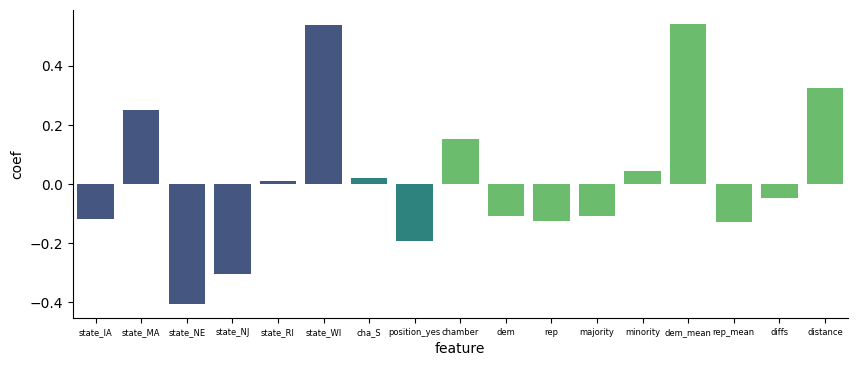

In [82]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(feature_coefs[feature_coefs["transformer"].isin(["num", "cat", "bin"])], 
            x="feature", y="coef", hue="transformer", legend=None, palette="viridis")
sns.despine()
plt.tick_params(axis="x", labelsize=6)